### Tracking
Kalman filter: 
1. estimating the state of a system
1. for continuous states
1. unimodal distribution
1. similar to monte carlo localization, but
    1. discrete states
    1. multi-modal distributions
    1. both are applicable to robot localization and tracking other vehicles
1. vs particle filters
    1. for both continous and multi modal
    
    
    

### Vs Histogram
1. Histogram
    1. assign each grid a probability
    1. devide the continous space into finite many grid cells
    1. approximates the posterior distribution by a histogram over the original distribution
1. in Kalman filters
    1. the distribution is given by a Gaussian 
        1. a continuous function over the space of locations
        1. sums up to 1
        1. charactorized by two parameters
            1. mean: $\mu$
            1. width (variance) $\sigma^2$
        1. estimate mean and variance for the location of object 
        1. $f(x)={1\over\sqrt{2\pi\sigma^2}} exp^{-{1\over2} {(x-\mu)^2\over\sigma^2}}$
        1. unimodal
        1. symetrical
        1. lower variance is better
        

In [4]:
from math import *
def f(mu, sigma2, x):
    return 1/sqrt(2*pi*sigma2)*exp(-.5*(x-mu)**2/sigma2)
print(f(10, 4, 8))
# max
print(f(10, 4, 10))


0.12098536225957168
0.19947114020071635


 ### Kalman filter
 1. measurements and motions

#### Quiz
1. measurement: product, bayes rule
1. motion: convolution, total probability

where is the new gaussian
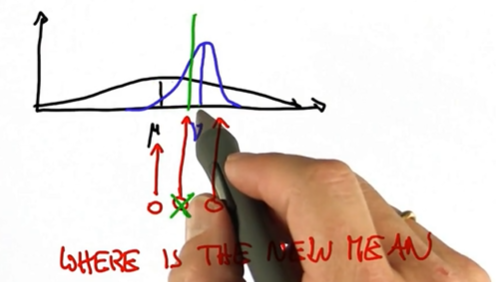

measure the peak of the new gaussian

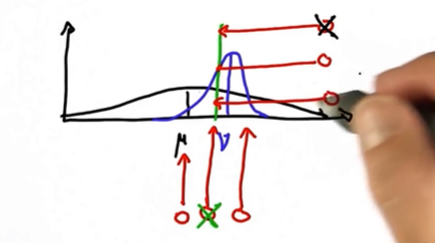

1. more certain than two component gaussians
1. covariance is smaller than either of the two covariances in isolation
1. intuitively, we gain information from two gaussians

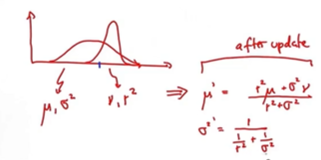



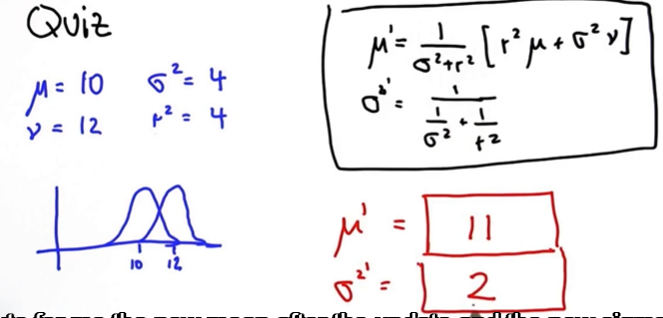


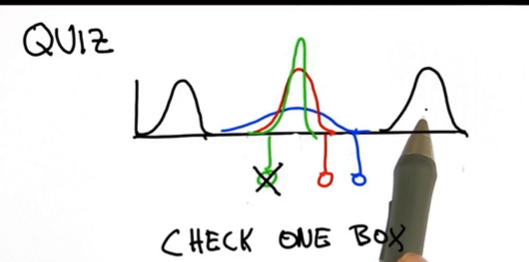

$\sigma$ is independent on $\mu$

### Measurement update

In [5]:
def update(mean1, var1, mean2, var2):
    new_mean = (var2*mean1+var1*mean2)/(var1+var2)
    new_var = 1/(1/var1+1/var2)
    return new_mean, new_var
print(update(10,8,13,2))

(12.4, 1.6)


### Motion update

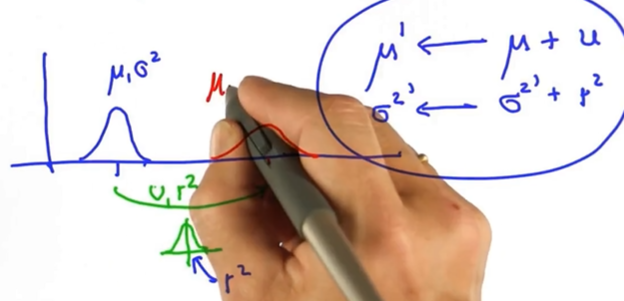

In [6]:
def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return new_mean, new_var
print(predict(10,4,12,4))

(22, 8)


### Measurements & Motions

In [10]:
measurements = [5, 6, 7, 9, 10]
motion = [1, 2, 3, 1,  1]
measurement_sig = 4
motion_sig = 2
mu = 0
sig = 10000

for i in range(len(motion)):
    mu, sig = update(mu, sig, measurements[i], measurement_sig)
    print('update:', mu, sig)
    mu, sig = predict(mu, sig, motion[i], motion_sig)
    print('predict:', mu, sig)

update 4.998000799680128 3.9984006397441023
predict 5.998000799680128 5.998400639744102
update 5.999200191953932 2.399744061425258
predict 7.999200191953932 4.399744061425258
update 7.4758241130429814 2.0951800575117594
predict 10.475824113042982 4.09518005751176
update 9.72923596636916 2.0235152416216957
predict 10.72923596636916 4.023515241621696
update 10.363549364291739 2.0058615808441944
predict 11.363549364291739 4.005861580844194


If uncertainty starts low and start with a wrong mean, the uncertainty goes up because we feel fairly confident on the wrong prior estimate, and we will be willing to update more

In [11]:
measurements = [5, 6, 7, 9, 10]
motion = [1, 2, 3, 1,  1]
measurement_sig = 4
motion_sig = 2
mu = 0
sig = 0.0000000001

for i in range(len(motion)):
    mu, sig = update(mu, sig, measurements[i], measurement_sig)
    print('update:', mu, sig)
    mu, sig = predict(mu, sig, motion[i], motion_sig)
    print('predict:', mu, sig)

update: 1.24999999996875e-10 9.99999999975e-11
predict: 1.000000000125 2.0000000001
update: 2.6666666668055554 1.3333333333777777
predict: 4.666666666805556 3.3333333333777775
update: 5.7272727273561985 1.8181818181950413
predict: 8.727272727356198 3.8181818181950415
update: 8.860465116322011 1.9534883720964848
predict: 9.860465116322011 3.953488372096485
update: 9.929824561425134 1.9883040935681267
predict: 10.929824561425134 3.988304093568127


## 1D - Kalman Filter to Many D's
1. sensor only see the position
1. volocity is inferred from seeing multiple position
1. able to make predictions about future locations

### High-Dimesional/Multivariate Gaussians
1. mean: a vector with 1 element for each of the dimensions
1. variance is replaced by a co-variance
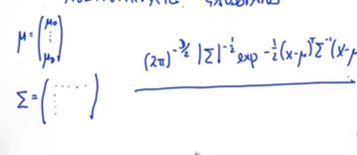

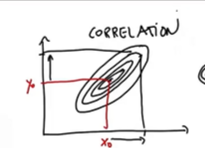

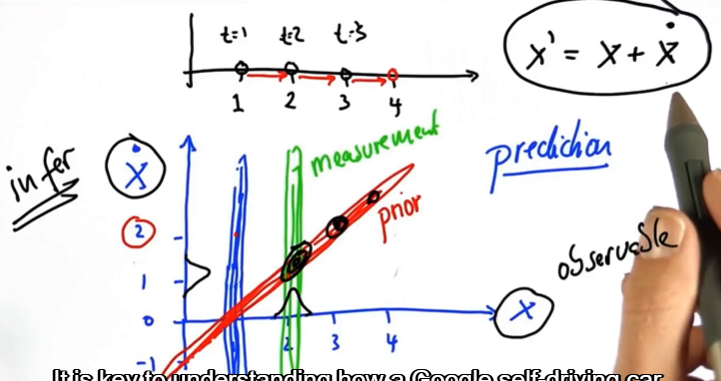
1. location is correlated with velocity.
1. when get location in t2, we get both location and velocity
1. new location = old location + velocity
    1. get velocity even if it's unable to measure velocity directly

### Big Lesson
1. Kalman Filter
    1. States
        1. reflect states of the physical world
            1. where the other car is 
            1. how fast it's moving
        1. Observables
            1. momentary location
        1. Hidden
            1. velocity can never be observed
        1. interaction of obversables and hiddens
            1. subsequent observations of the observable variables give us information about these hidden variables
            1. we can estimate the hidden variables
            1. from multiple observations of the places of the object (location), we can estimate the velocity
    1. popular
        1. esay to calculate

### Design of KF
1. State transition function
1. measurement function

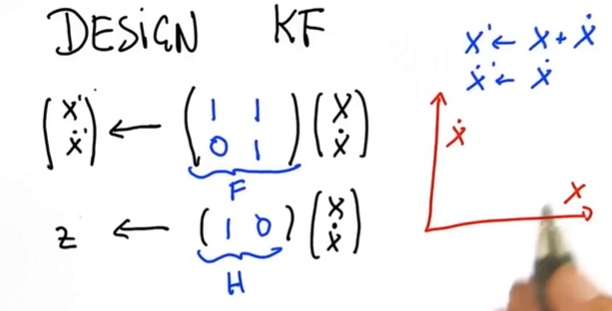

1. X: estimate
1. P: covariance capturing uncertainty
1. F: state transition matrix
1. u: motion vector/control matrix 
1. z: measurement
1. H: measurement function, mapping states to measurements
1. R: the measurement noise covariance, i.e, the covariance of the measurement parameters in the z vector
1. I: identity matrix


#### Prediction
1. $X' = F X+u$
1. $P' = F P F^T$

#### Measurement Update
1. Error: $y =z - H x$ 
1. $S = H P H^T + R$ (map error into a matrix s)
1. Kalman gain: $K = P H^T S^{-1}$
1. Update estimate: $x' = x + Ky$
1. Update uncertainty: $P' = (I-KH)P$


https://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

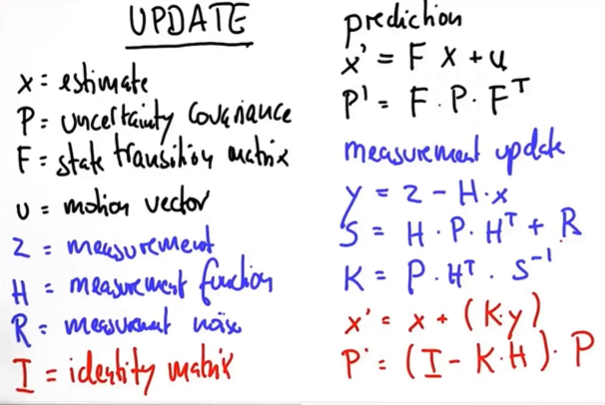

In [3]:
import numpy as np
x = np.array([[0], [0]]) # initial state (location and velocity)
P = np.array([[1000,0],[0, 1000]]) # covariance, capturing, initial uncertainty
u = np.array([[0],[0]]) # external motion/motion vector
F = np.array([[1,1], [0,1]]) # next state function/state transition matrix
H = np.array([[1, 0]]) # measurement function, mapping states to observations
R = np.array([[1]]) # measurement uncertainty
I = np.array([[1,0],[0,1]]) # identity matrix


measurements = [1, 2, 3]

def kalman_filter(x, P):
    for n in range(len(measurements)):
        #update
        Z = np.array([[measurements[n]]]) # measured variable
        y = Z - np.matmul(H,x)
        
        S = H.dot(P).dot(H.transpose()) + R
        K = P.dot(H.transpose()).dot(np.linalg.inv(S))
        x = x + K.dot(y)
        P = (I - (K*H)) * P
        
        #prediction
        x = F.dot(x) + u
        P = F.dot(P).dot(F.transpose())
        
        print('x: ', x)
        print('P: ', P)
    return P, x
kalman_filter(x, P)


x:  [[0.999001]
 [0.      ]]
P:  [[1000.999001 1000.      ]
 [1000.       1000.      ]]
x:  [[2.99800299]
 [0.999002  ]]
P:  [[   2.99401496 1000.        ]
 [   1.99501297 1000.        ]]
x:  [[3.9994995]
 [0.9999995]]
P:  [[ 999.75311515 1000.        ]
 [ 999.00348978 1000.        ]]


(array([[ 999.75311515, 1000.        ],
        [ 999.00348978, 1000.        ]]), array([[3.9994995],
        [0.9999995]]))

In [18]:
import numpy as np
x = np.array([[0], [0]]) # initial state (location and velocity)
P = np.array([[1000,0],[0, 1000]]) # covariance, capturing, initial uncertainty
u = np.array([[0],[0]]) # external motion/motion vector
F = np.array([[1,1], [0,1]]) # next state function/state transition matrix
H = np.array([[1, 0]]) # measurement function, mapping states to observations
R = np.array([[1]]) # measurement uncertainty
I = np.array([[1,0],[0,1]]) # identity matrix


measurements = [1, 2, 3]

def kalman_filter(x, P):
    for n in range(len(measurements)):
        #update
        Z = np.array([[measurements[n]]]) # measured variable
        y = Z - H.dot(x)        
        S = H.dot(P).dot(H.transpose()) + R
        K = P.dot(H.transpose()).dot(np.linalg.inv(S))
        x = x + K.dot(y)
        P = (I - (K*H)).dot(P)
        
        #prediction
        x = F.dot(x) + u
        P = F.dot(P).dot(F.transpose())
        
        print('x: ', x)
        print('P: ', P)
    return P, x
kalman_filter(x, P)


x:  [[0.999001]
 [0.      ]]
P:  [[1000.999001 1000.      ]
 [1000.       1000.      ]]
x:  [[2.99800299]
 [0.999002  ]]
P:  [[4.99002494 2.99301795]
 [2.99301795 1.99501297]]
x:  [[3.99966644]
 [0.99999983]]
P:  [[2.33189042 0.99916761]
 [0.99916761 0.49950058]]


(array([[2.33189042, 0.99916761],
        [0.99916761, 0.49950058]]), array([[3.99966644],
        [0.99999983]]))

In [11]:
np.linalg.cholesky([[1001]])

array([[31.63858404]])